In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from matplotlib.lines import Line2D 
from scipy.stats import norm

## read data

In [66]:
df_list = []
for i in range(9):
    for j in ['025', '075']:
        df_tmp = pd.read_csv('results/rbf/sim_par_'+str(i+1)+'_'+j+'_25_09_26.csv')
        if i < 3:
            df_tmp['x'] = df_tmp['n_target']
            df_tmp['x_name'] = 'n_target, n_source=300'
        if i >= 3 and i < 6: 
            df_tmp['x'] = df_tmp['n_target']
            df_tmp['x_name'] = 'n_target=n_source'
        if i >= 6 and i < 9: 
            df_tmp['x'] = df_tmp['n_plus'] + df_tmp['n_minus']
            df_tmp['x_name'] = 'n_source, n_target=300'
        df_tmp['p'] = 5
        df_tmp['distributions'] = 'Gaussian'
        df_tmp['method_name'] = df_tmp['estimator']+'_'+df_tmp['type']+'_'+df_tmp['gamma_selection_name']+'_'+df_tmp['kernel']
        df_tmp.pop('estimator_name')
        df_tmp['MSE'] = (df_tmp['pi'] - df_tmp['pi_target'])**2
        df_list.append(df_tmp)
    for j in ['025', '075']:
        df_tmp = pd.read_csv('results/laplacian/sim_par_'+str(i+1)+'_'+j+'_25_09_26.csv')
        if i < 3:
            df_tmp['x'] = df_tmp['n_target']
            df_tmp['x_name'] = 'n_target, n_source=300'
        if i >= 3 and i < 6: 
            df_tmp['x'] = df_tmp['n_target']
            df_tmp['x_name'] = 'n_target=n_source'
        if i >= 6 and i < 9: 
            df_tmp['x'] = df_tmp['n_plus'] + df_tmp['n_minus']
            df_tmp['x_name'] = 'n_source, n_target=300'
        df_tmp['p'] = 5
        df_tmp['distributions'] = 'Gaussian'
        df_tmp['method_name'] = df_tmp['estimator']+'_'+df_tmp['type']+'_'+df_tmp['gamma_selection_name']+'_'+df_tmp['kernel']
        df_tmp.pop('estimator_name')
        df_tmp['MSE'] = (df_tmp['pi'] - df_tmp['pi_target'])**2
        df_list.append(df_tmp)
    
df = pd.concat(df_list, ignore_index=True)
df["method_name"] = df["method_name"].astype(str).str.strip()

In [67]:
sim_params_colnames = ['sim_scenario', 'n_plus', 'n_minus', 'n_target', 'pi_target', 
                       'gamma_selection_name', 'estimator', 'type', 'kernel',
                        'x', 'x_name', 'p', 'distributions', 'method_name']
values_colnames = ['pi', 'var_n', 'var', 'gamma', 'MSE']

In [68]:
df = df[sim_params_colnames+values_colnames]

In [77]:
df_mse = copy.copy(df)
df_mse = df_mse[df_mse.columns[:14].tolist()+['MSE']].groupby(df_mse.columns[:14].tolist()).agg('mean').reset_index()

In [96]:
hue_order = [ 'nothing',
    "ipr_U_one_over_p", "ipr_V_one_over_p", "nrm_U_one_over_p", "nrm_V_one_over_p",
    "ipr_U_grid", "ipr_V_grid", "ipr_U_numerical", "ipr_V_numerical",
    "ipr_U_bootstrap_mse", "ipr_V_bootstrap_mse", "ipr_U_bootstrap_var", "ipr_V_bootstrap_var",
    "ipr_U_distance","ipr_V_distance"
]

In [ ]:
# hue_order = [h+'_rbf' for h in hue_order] #+ [h+'_laplacian' for h in hue_order]


In [87]:
# hue_order = [
#     "ipr_U_one_over_p", "ipr_V_one_over_p", "nrm_U_one_over_p", "nrm_V_one_over_p",
#     "ipr_U_grid", "ipr_U_numerical",
#     "ipr_U_bootstrap_mse", "ipr_U_bootstrap_var", 
#     "ipr_U_distance","ipr_V_distance" 
# ]

colors = sns.color_palette("tab20", n_colors=len(hue_order))
custom_palette = dict(zip(hue_order, colors))

In [88]:
df_mse = df_mse.sort_values(by=["pi_target", "sim_scenario"])

In [89]:
df_mse['facet_blocks'] = df_mse['sim_scenario'] + ", pi_target = " + df_mse['pi_target'].astype(str)

In [90]:
df_mse['facet_blocks'].unique()

array(['sim_par_1, pi_target = 0.25', 'sim_par_2, pi_target = 0.25',
       'sim_par_3, pi_target = 0.25', 'sim_par_4, pi_target = 0.25',
       'sim_par_5, pi_target = 0.25', 'sim_par_6, pi_target = 0.25',
       'sim_par_7, pi_target = 0.25', 'sim_par_8, pi_target = 0.25',
       'sim_par_9, pi_target = 0.25', 'sim_par_1, pi_target = 0.75',
       'sim_par_2, pi_target = 0.75', 'sim_par_3, pi_target = 0.75',
       'sim_par_4, pi_target = 0.75', 'sim_par_5, pi_target = 0.75',
       'sim_par_6, pi_target = 0.75', 'sim_par_7, pi_target = 0.75',
       'sim_par_8, pi_target = 0.75', 'sim_par_9, pi_target = 0.75'],
      dtype=object)

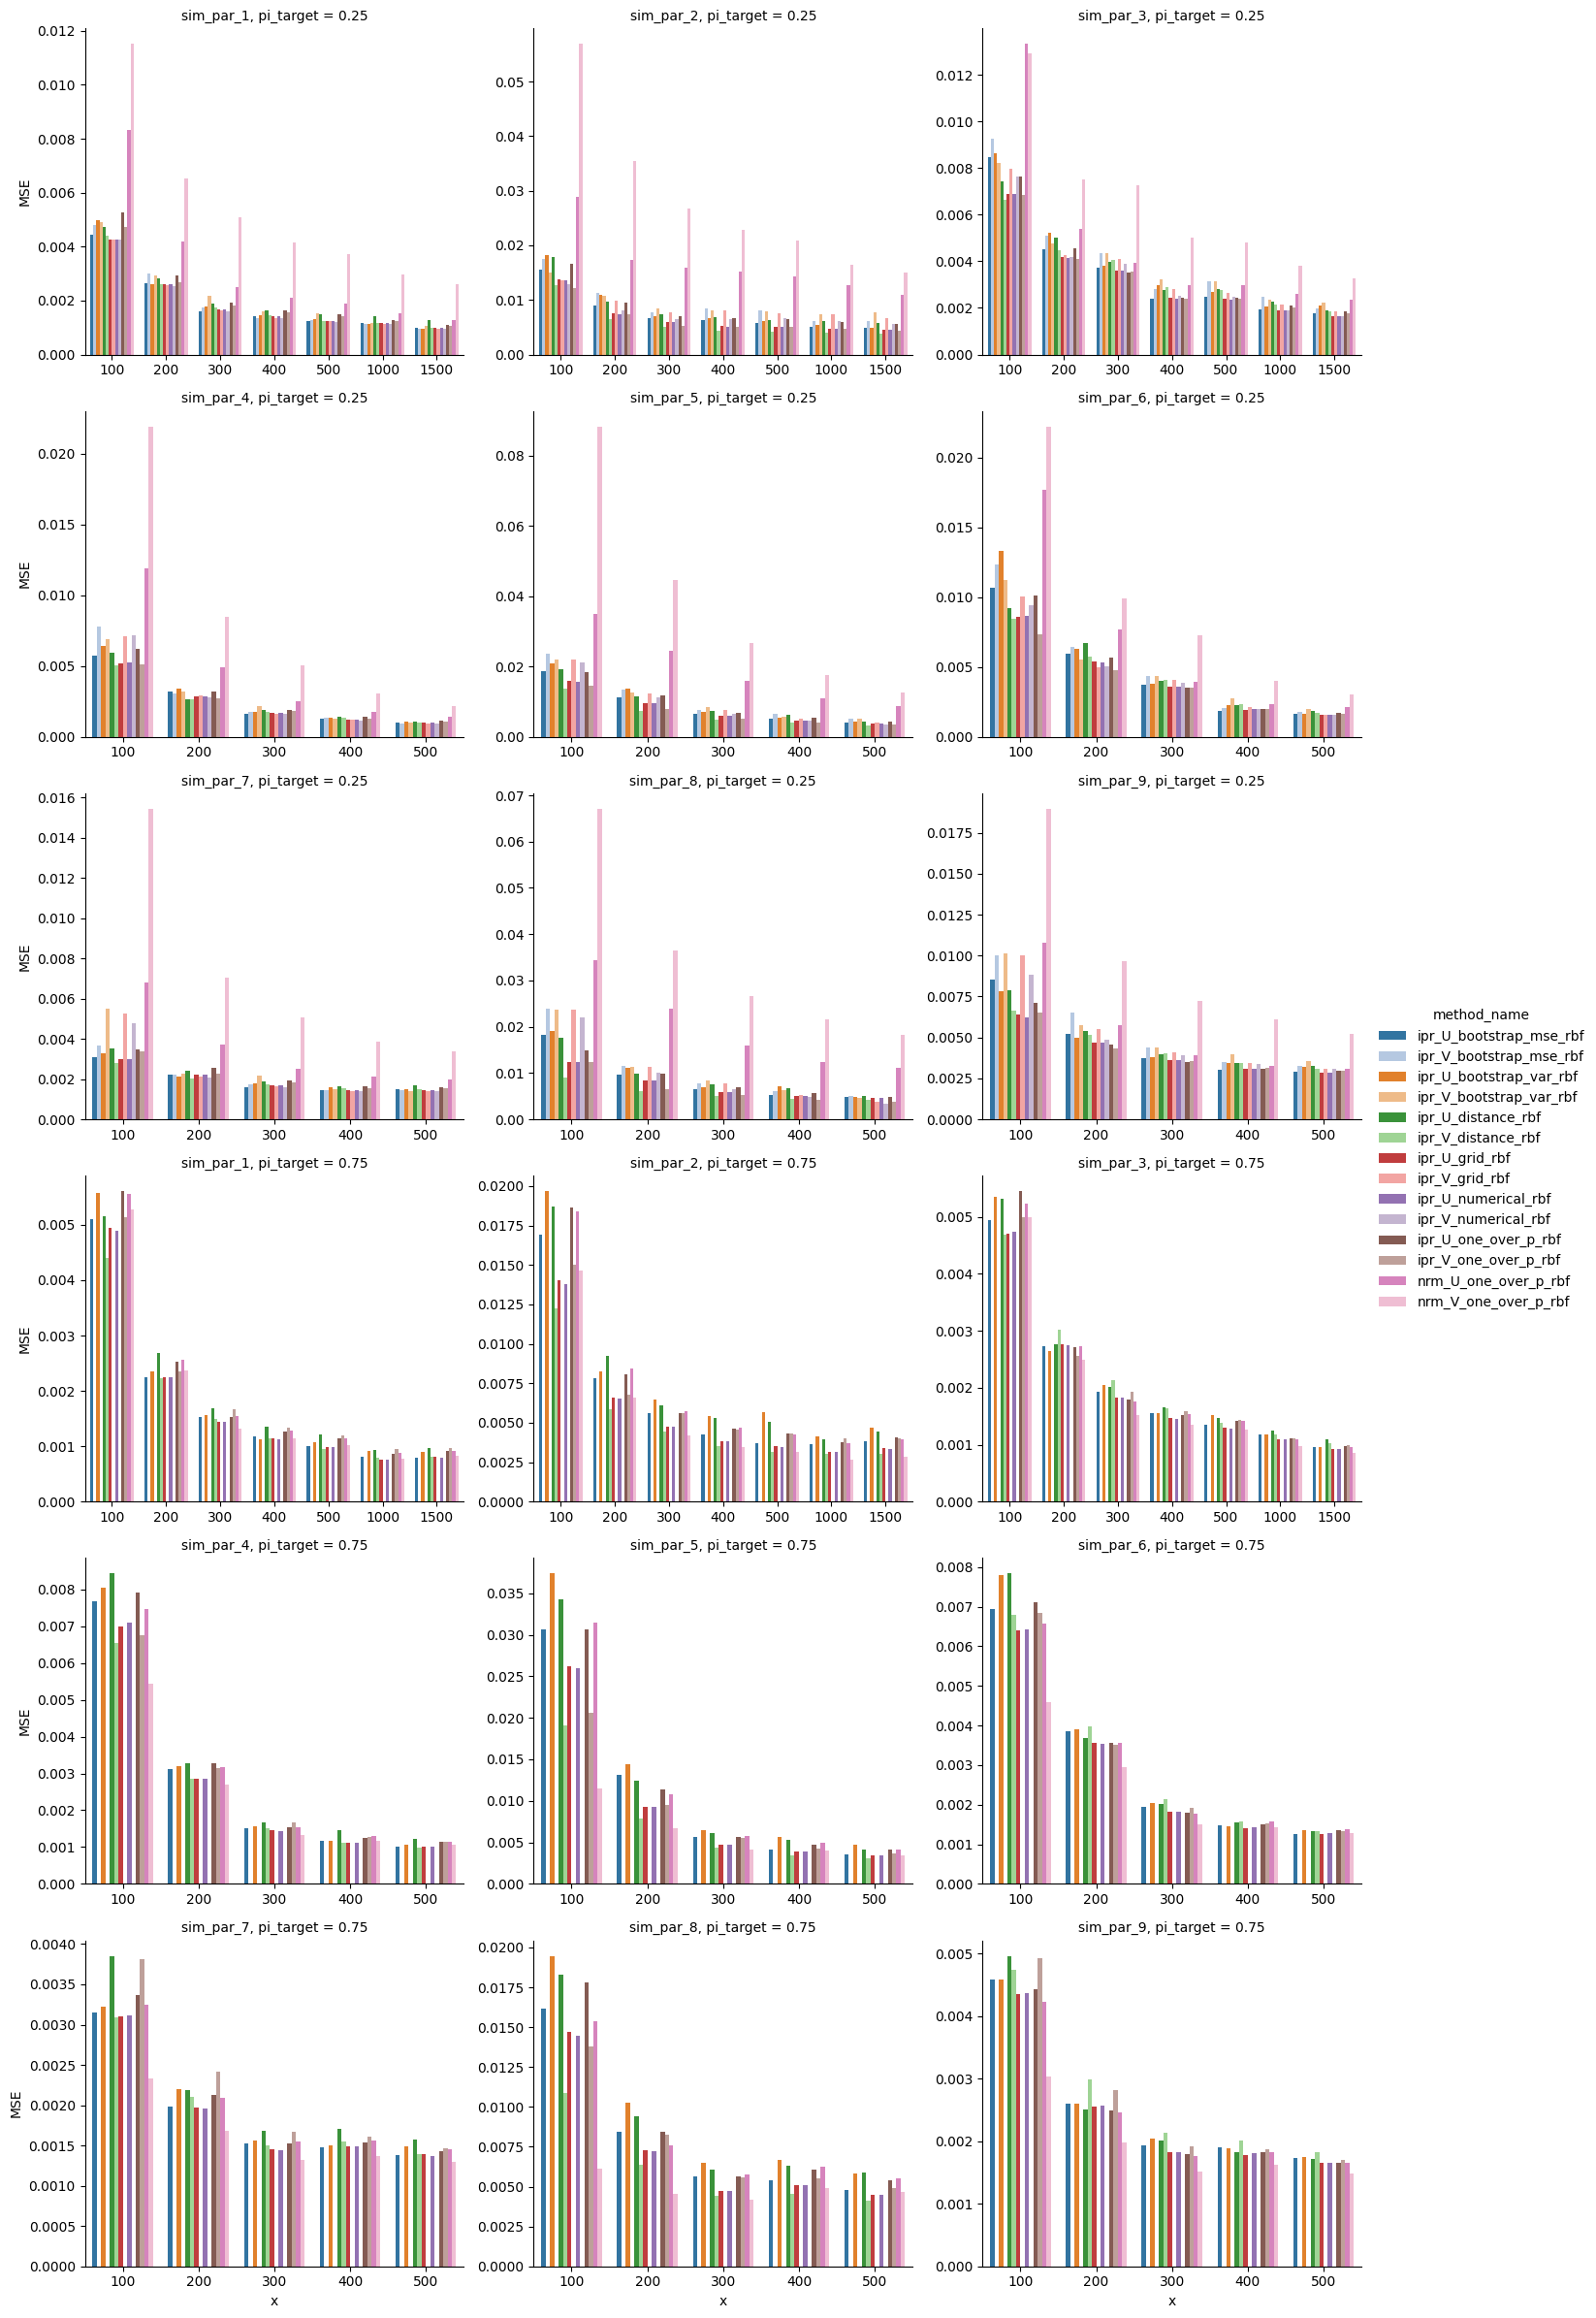

In [98]:
g = sns.catplot(data=df_mse[df_mse['kernel'] == 'rbf'],
    x="x",   # categories on x-axis
    y="MSE",                    # bar height
    hue="method_name",                 # different colors for U/V
    # hue_order=hue_order,
    palette='tab20', #custom_palette,
    col="facet_blocks",         # facet by scenario across columns
    # row="pi_target",            # facet by pi_target across rows
    kind="bar",
    height=4,
    aspect=1.2,
    sharey=False,
    sharex=False,
    col_wrap=3
)
g.set_titles("{col_name}")
plt.show()

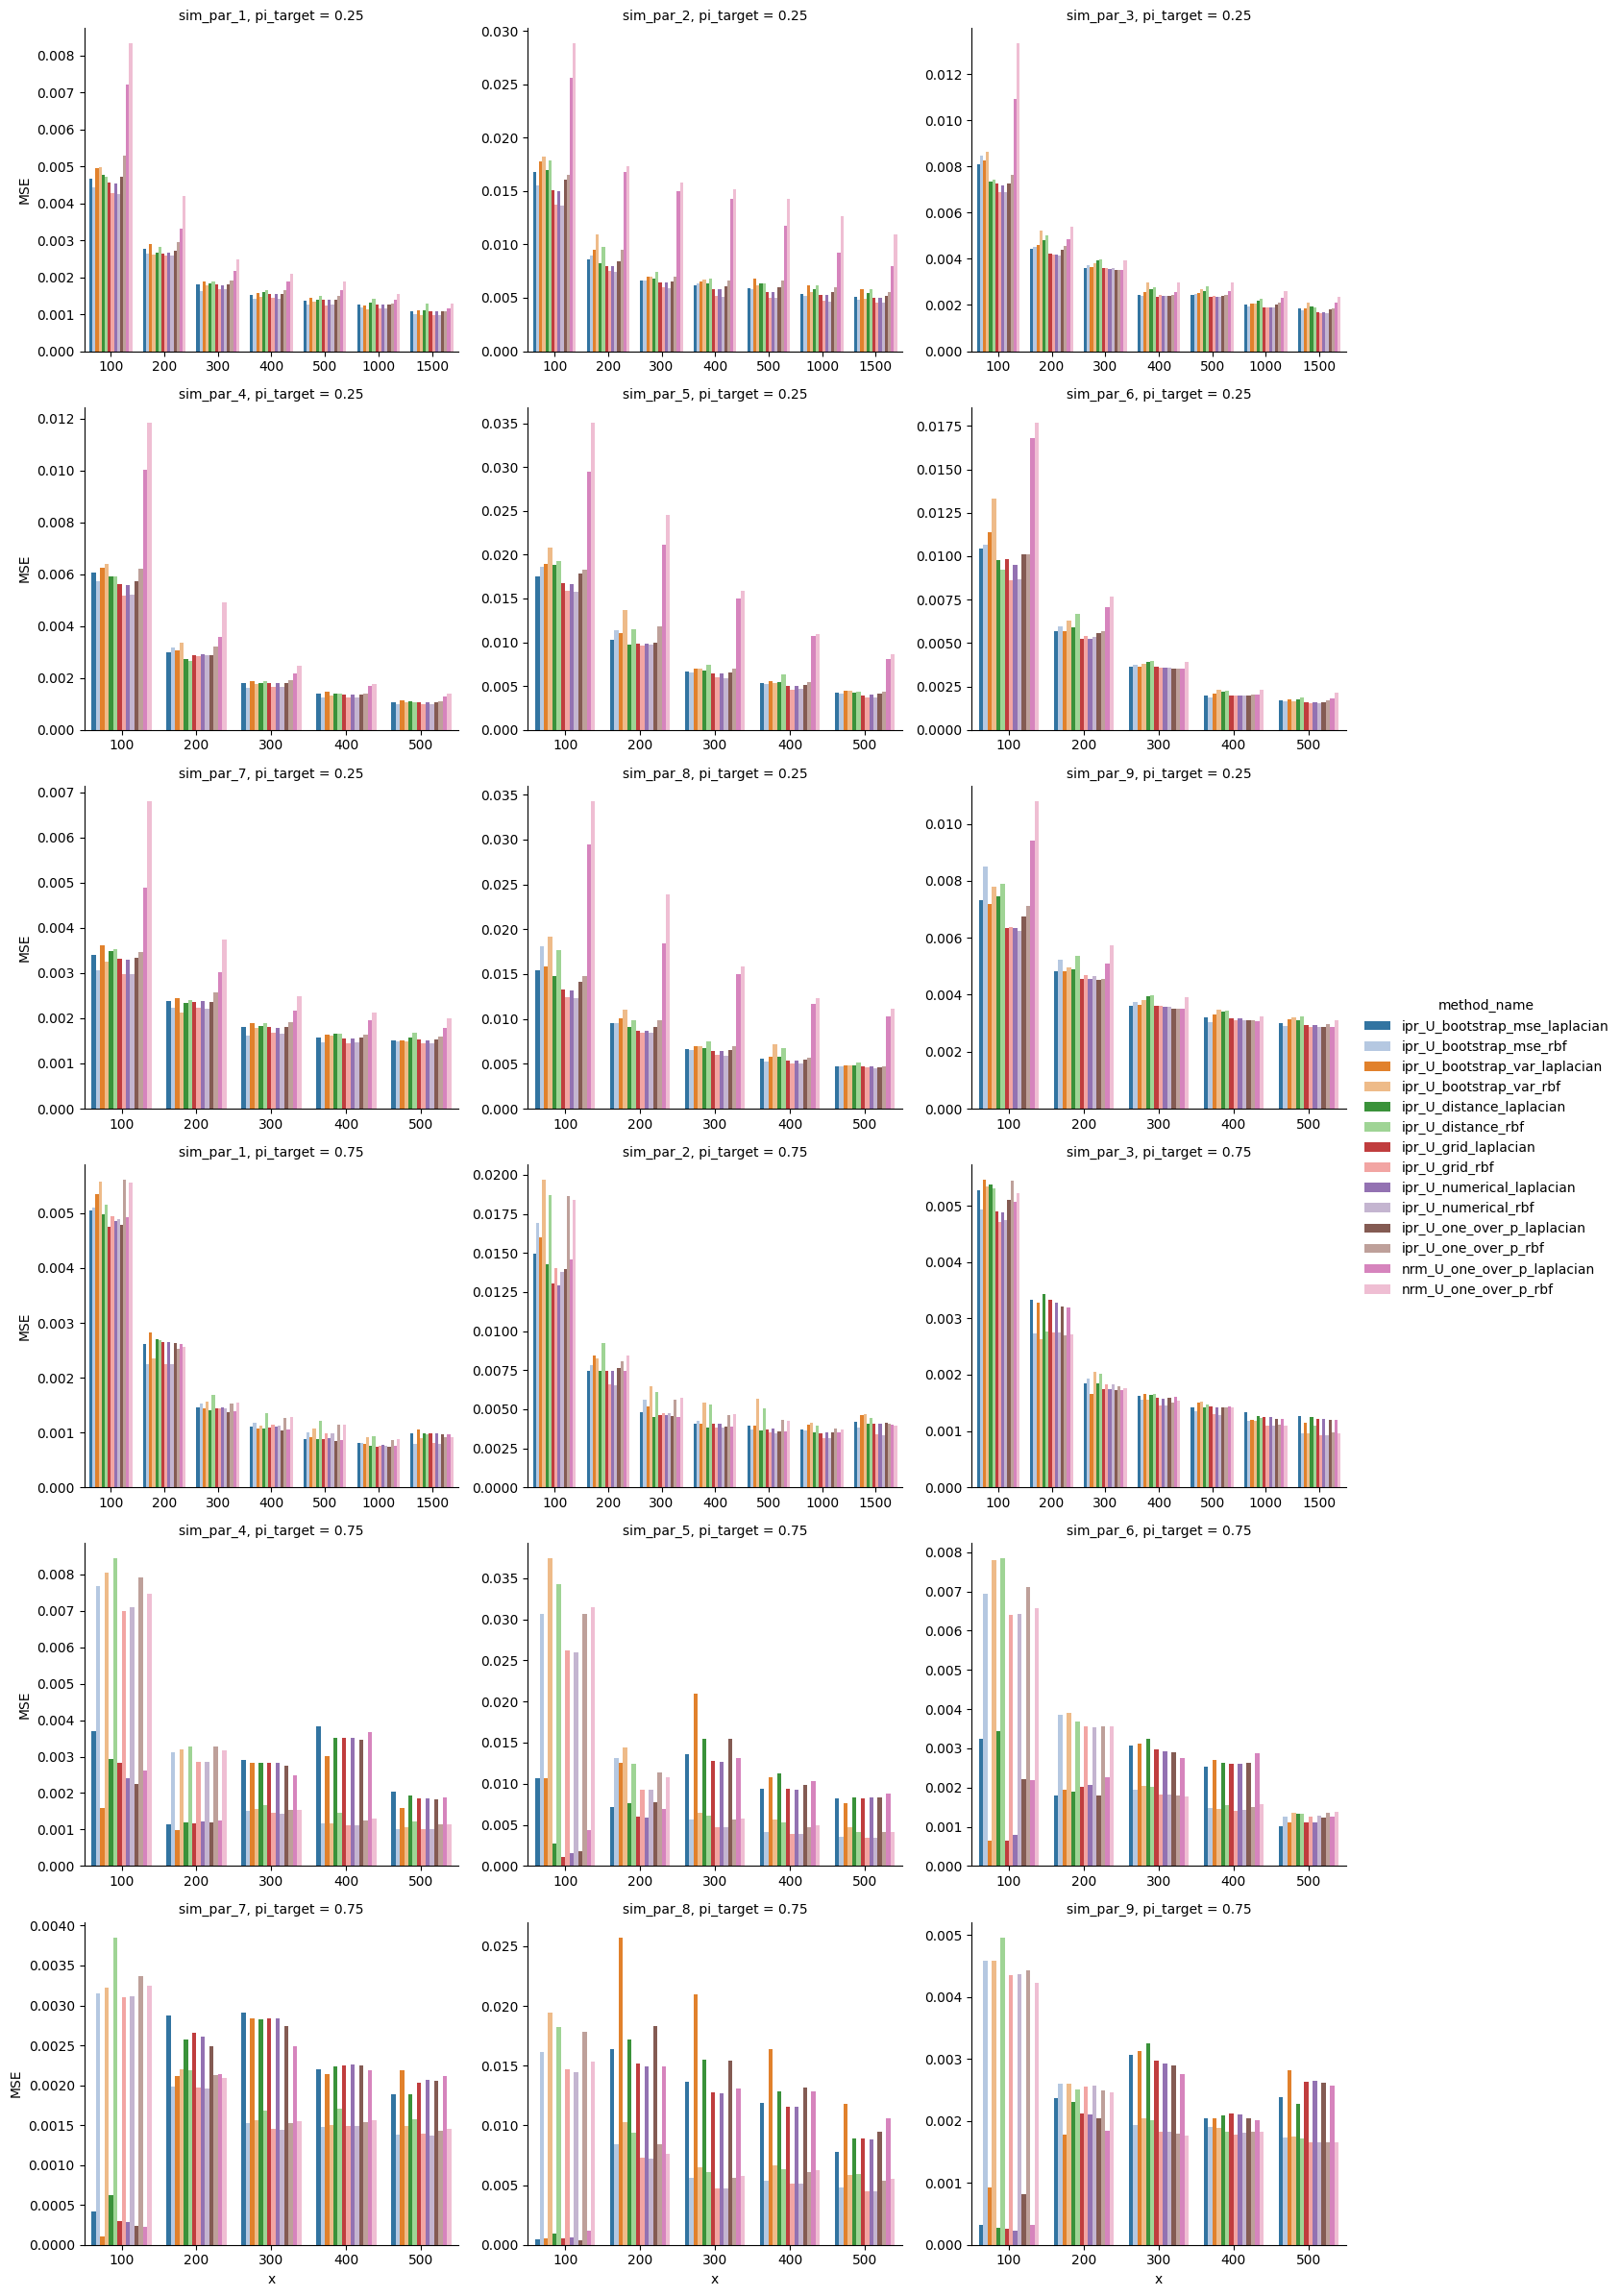

In [94]:
g = sns.catplot(data=df_mse[df_mse['type'] == 'U'],
    x="x",   # categories on x-axis
    y="MSE",                    # bar height
    hue="method_name",                 # different colors for U/V
    # hue_order=hue_order,
    palette='tab20', #custom_palette,
    col="facet_blocks",         # facet by scenario across columns
    # row="pi_target",            # facet by pi_target across rows
    kind="bar",
    height=4,
    aspect=1.2,
    sharey=False,
    sharex=False,
    col_wrap=3
)
g.set_titles("{col_name}")
plt.show()

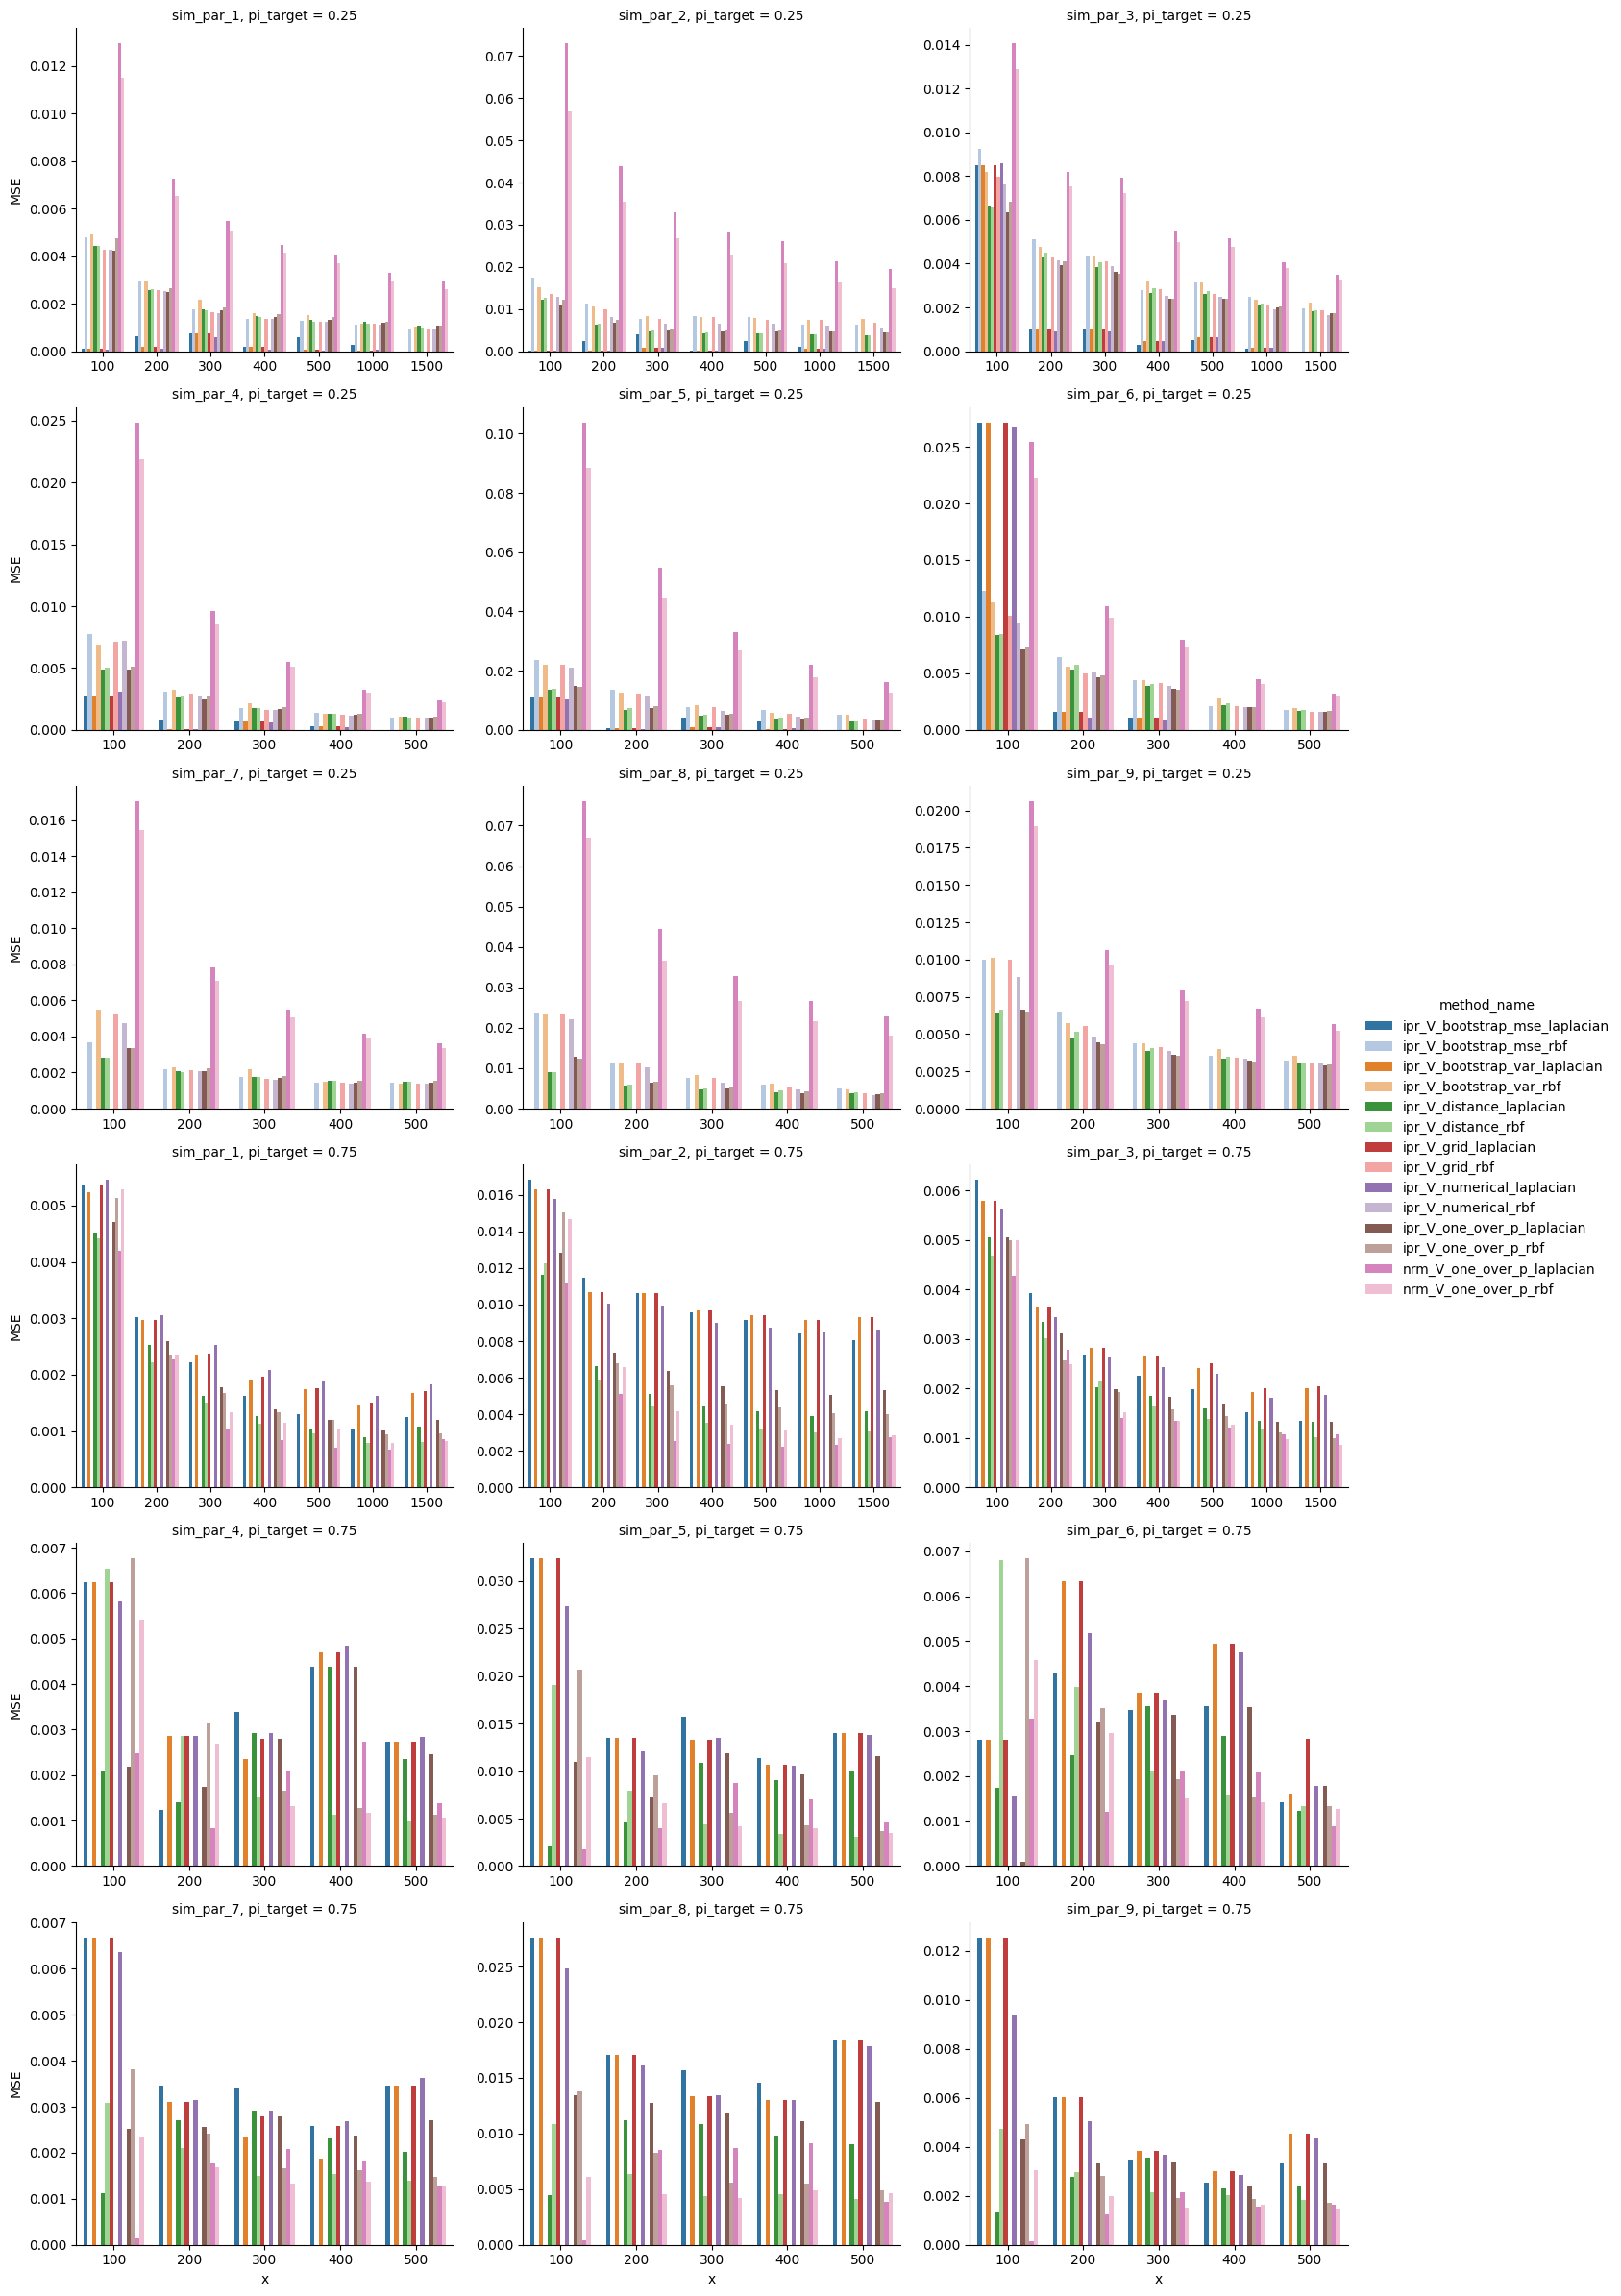

In [95]:
g = sns.catplot(data=df_mse[df_mse['type'] == 'V'],
    x="x",   # categories on x-axis
    y="MSE",                    # bar height
    hue="method_name",                 # different colors for U/V
    # hue_order=hue_order,
    palette='tab20', #custom_palette,
    col="facet_blocks",         # facet by scenario across columns
    # row="pi_target",            # facet by pi_target across rows
    kind="bar",
    height=4,
    aspect=1.2,
    sharey=False,
    sharex=False,
    col_wrap=3
)
g.set_titles("{col_name}")
plt.show()

In [3]:
df = df.sort_values(by=["pi_target", "sim_scenario"])

In [4]:
df['facet_blocks'] = df['sim_scenario'] + ", pi_target = " + df['pi_target'].astype(str)

In [8]:
df['method_name'] = df['estimator']+'_'+df['type']+'_'+df['gamma_selection_name']
df["method_name"] = df["method_name"].astype(str).str.strip()

In [10]:
df['log_time'] = np.log(df['time'])

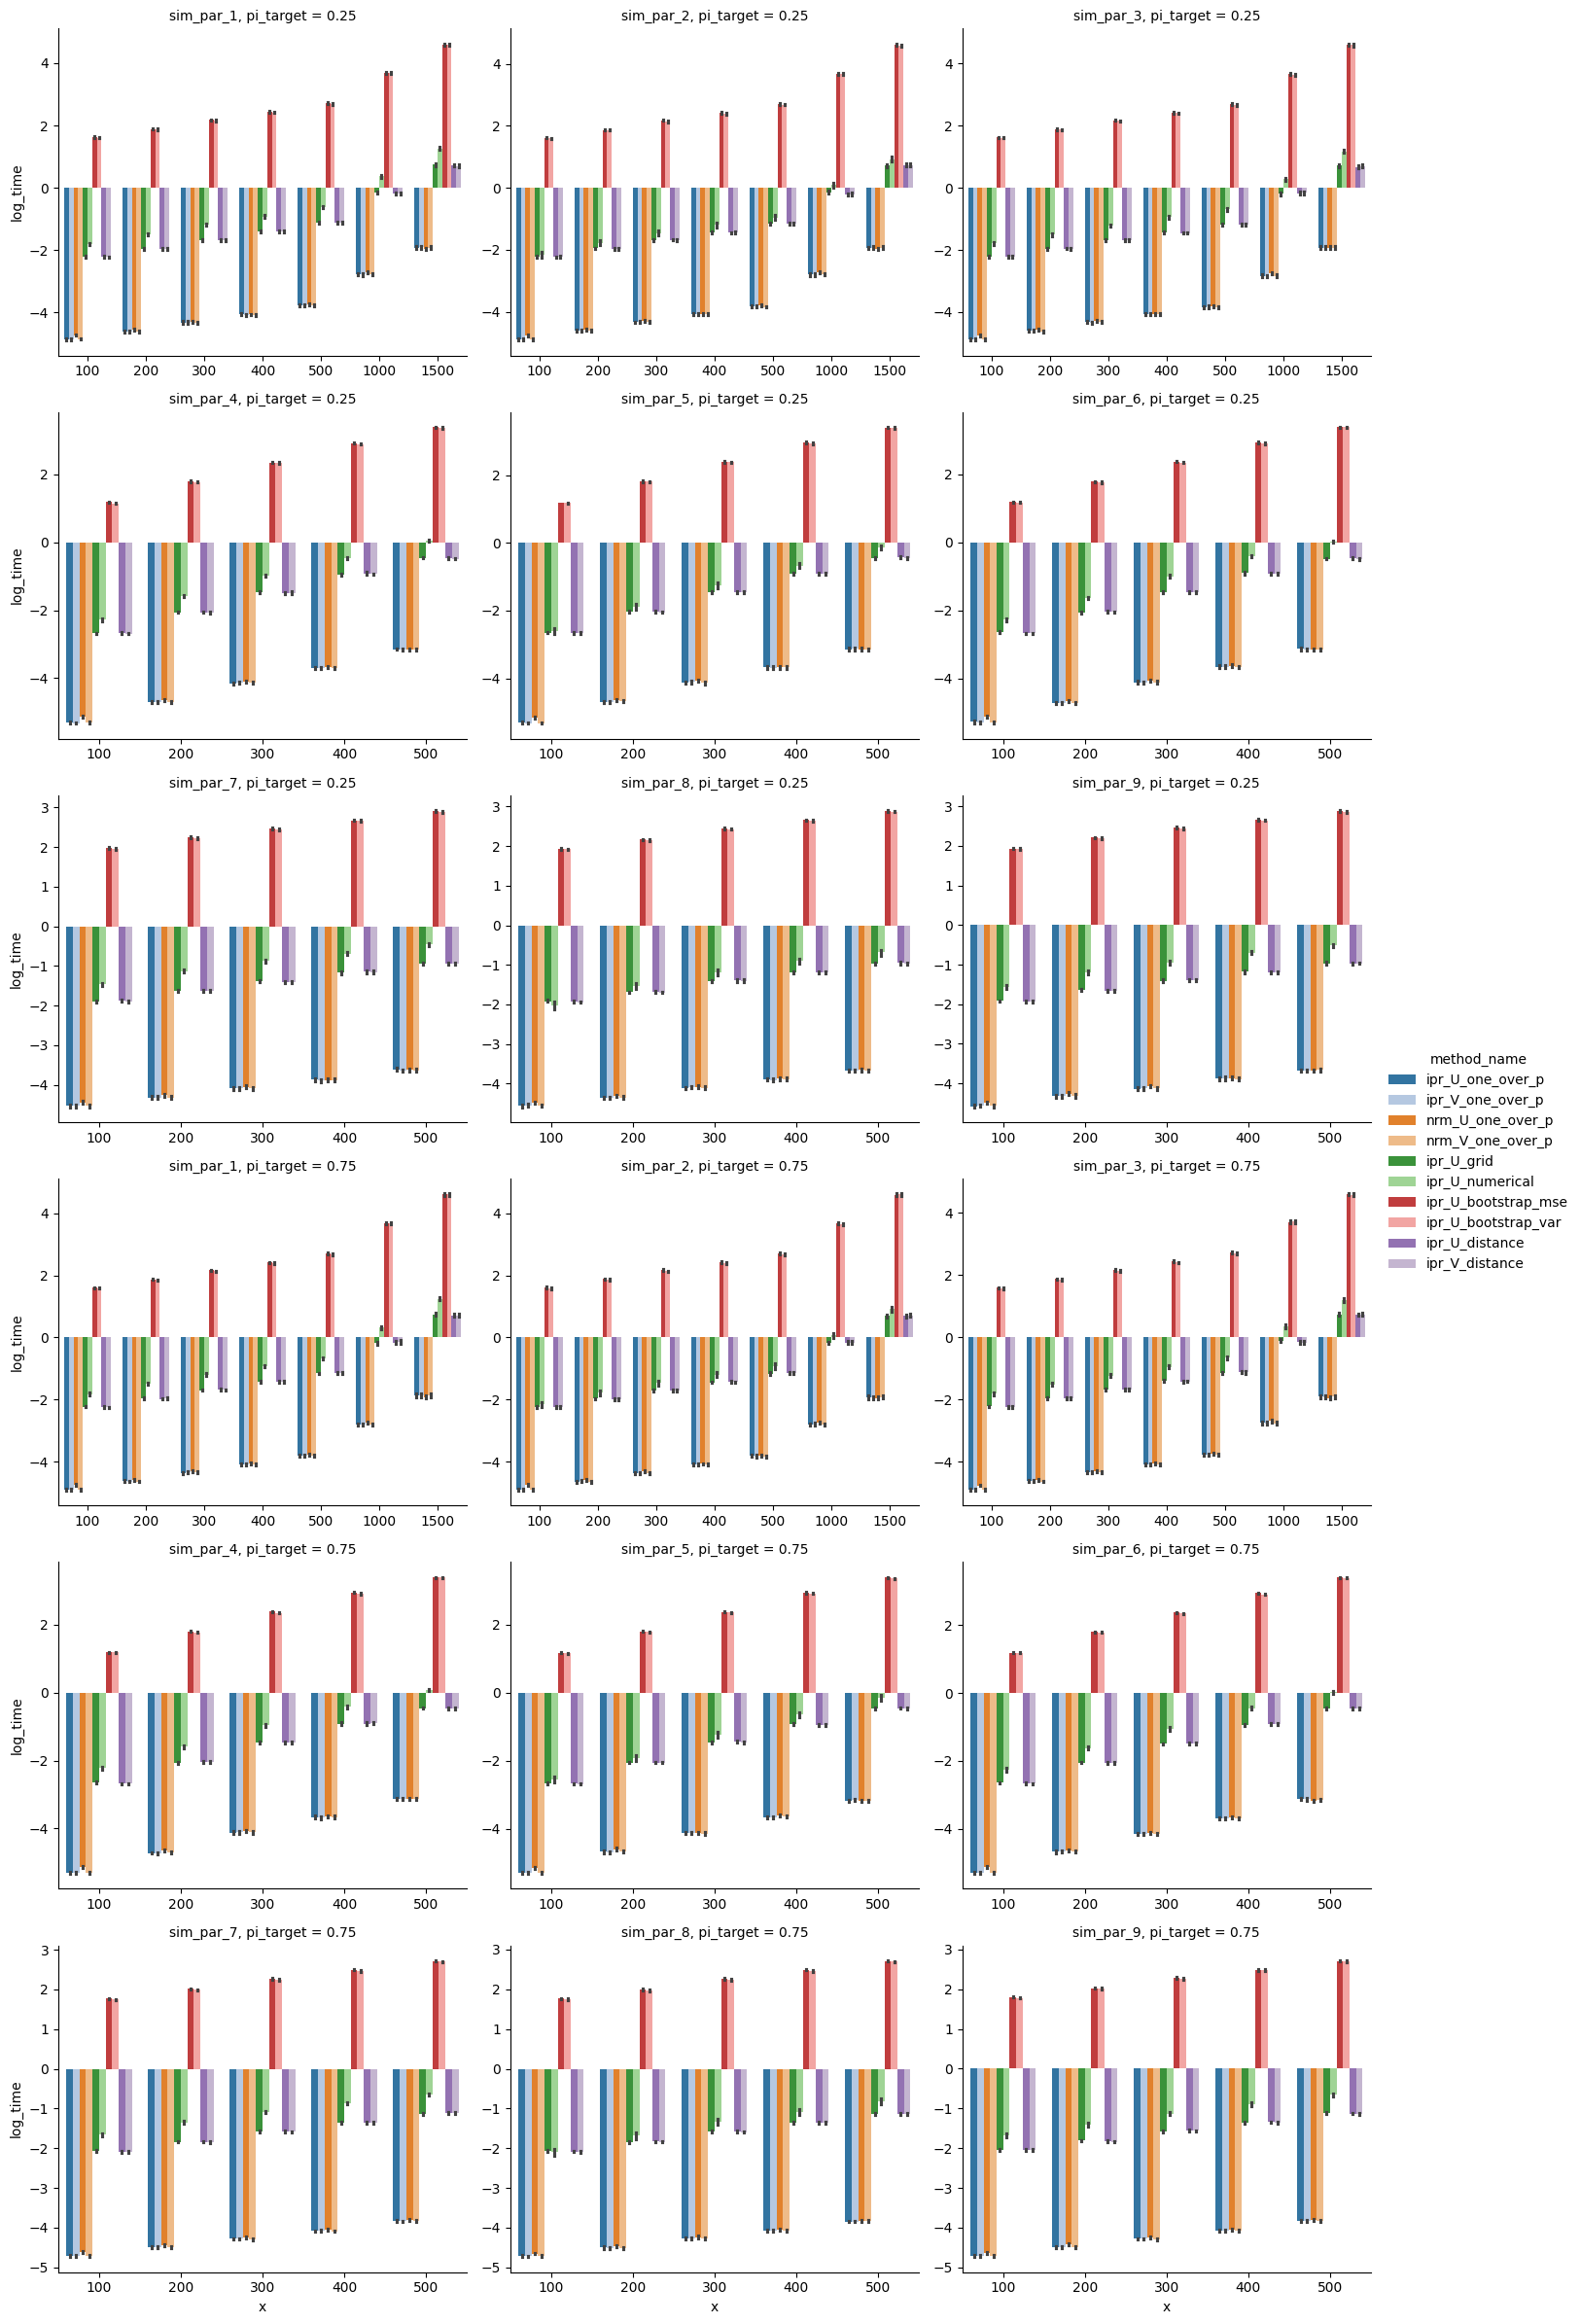

In [11]:
g = sns.catplot(data=df,
    x="x",   # categories on x-axis
    y="log_time",                    # bar height
    hue="method_name",                 # different colors for U/V
    hue_order=hue_order,
    palette=custom_palette,
    col="facet_blocks",         # facet by scenario across columns
    # row="pi_target",            # facet by pi_target across rows
    kind="bar",
    height=4,
    aspect=1.2,
    sharey=False,
    sharex=False,
    col_wrap=3
)
g.set_titles("{col_name}")
plt.show()

In [7]:
df_mse["method_name"] = df_mse["method_name"].astype(str).str.strip()

In [8]:
df_mse["method_name"] 

0      ipr_U_bootstrap_mse
1      ipr_U_bootstrap_var
2           ipr_U_distance
3           ipr_V_distance
4               ipr_U_grid
              ...         
415        ipr_U_numerical
416       ipr_U_one_over_p
417       ipr_V_one_over_p
418       nrm_U_one_over_p
419       nrm_V_one_over_p
Name: method_name, Length: 420, dtype: object

In [9]:
for m in method_names:
        df_tmp = pd.read_csv('results/'+sim_scenario+'/'+m+'_pi_target'+pi_target_name+'.csv')
        df_tmp['method'] = m
        df_list.append(df_tmp)

NameError: name 'method_names' is not defined

In [ ]:
def plot_two_plots(sim_scenario, pi_target, pi_target_name):
    df_list = []

    for m in method_names:
        df_tmp = pd.read_csv('results/'+sim_scenario+'/'+m+'_pi_target'+pi_target_name+'.csv')
        df_tmp['method'] = m
        df_list.append(df_tmp)
    
    df = pd.concat(df_list, ignore_index=True)
    df['method'] = pd.Categorical(df['method'], categories=method_names, ordered=True)

    df_var = df.groupby(['method', 'n_target'], observed=True).agg(var_emp=('pi', lambda x: np.var(x, ddof=1))).reset_index()
    df_merged = pd.merge(df, df_var, on=['n_target', 'method'], how='left')

    df_tmp1 = pd.read_csv('results/'+sim_scenario+'/'+'rbf'+'_pi_target'+pi_target_name+'.csv')
    df_tmp1['method'] = 'ipr'
    df_tmp2 = pd.read_csv('results/'+sim_scenario+'/'+'rbf'+'_pi_target'+pi_target_name+'.csv')
    df_tmp2['method'] = 'nrm'
    df_tmp1 = pd.concat([df_tmp1, df_tmp2], ignore_index=True)
    df_tmp1['method'] = pd.Categorical(df_tmp1['method'], categories=method_names, ordered=True)

    # df_tmp1 = pd.read_csv('results/'+sim_scenario+'/'+'rbf'+'_pi_target'+pi_target_name+'.csv')
    # df_tmp1['method'] = 'ipr'


    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(16, 5.5), sharex=False)

    flierprops = dict(marker='o', markersize=2, linestyle='none', markerfacecolor='darkgray')

    # --- Left plot ---
    sns.boxplot(ax=axes[0], data=df, x='n_target', y='pi', hue='method', flierprops=flierprops)
    axes[0].hlines(y=pi_target, xmin=-0.5, xmax=len(df['n_target'].unique())-0.5, linestyle='dotted', color='black')
    axes[0].set_title("Estimators")

    # --- Right plot ---
    sns.boxplot(ax=axes[1], data=df_merged, x='n_target', y='var_n', hue='method', boxprops={'alpha':0.5}, flierprops=flierprops)
    sns.stripplot(
        ax=axes[1],
        data=df_merged[['n_target', 'method', 'var_emp']].drop_duplicates(),
        x='n_target', y='var_emp', hue='method',
        dodge=True, size=6, marker="X", edgecolor='black', linewidth=1
    )
    sns.stripplot(
        ax=axes[1],
        data=df_tmp1[['n_target', 'method', 'var_n']],
        x='n_target', y='var_n', hue='method',
        dodge=True, size=6, marker="o", edgecolor='black', linewidth=1
    )
    axes[1].set_title("Variances")

    # Fix duplicate legends on right plot
    handles, labels = axes[1].get_legend_handles_labels()
    method_handles = handles[:len(df_merged['method'].unique())]
    method_labels = labels[:len(df_merged['method'].unique())]

    empirical_handle = Line2D(
        [0], [0], marker='X', color='w', label='Empirical variances',
        markerfacecolor='gray', markersize=6, markeredgecolor='black'
    )

    empirical_handle2 = Line2D(
        [0], [0], marker='o', color='w', label='True for Gaussian kernel',
        markerfacecolor='gray', markersize=6, markeredgecolor='black'
    )

    axes[1].legend(
        handles=method_handles + [empirical_handle] + [empirical_handle2],
        labels=method_labels + ['Empirical Variance'] + ['True for Gaussian kernel']
    )

    df_mse = df.groupby(['method', 'n_target'], observed=True).agg(mse=('pi', lambda x: np.mean((x - pi_target)**2))).reset_index()

    sns.barplot(ax=axes[2], data=df_mse, x='n_target', y='mse', hue='method')
    axes[2].set_title("MSE")

    fig.suptitle("Comparison of Estimators: "+sim_scenario+", pi_target="+str(pi_target), fontsize=16, weight='bold')

    plt.tight_layout()
    plt.show()

    # plt.figure(figsize=(12, 6))
    # sns.boxplot(df, x='n_target', y='pi', hue='method')
    # plt.hlines(y=0.7, xmin=0-0.5, xmax=6.5, color='black')
    # plt.show()

    
    # plt.figure(figsize=(12, 6))
    # sns.boxplot(df_merged, x='n_target', y='var_n', hue='method', boxprops={'alpha':0.5})
    # sns.stripplot(data=df_merged[['n_target', 'method', 'var_emp']].drop_duplicates(), x='n_target', y='var_emp', hue='method',
    #             dodge=True, size=8, marker="X", edgecolor='black', linewidth=1)
    # # Fix duplicate legends
    # handles, labels = plt.gca().get_legend_handles_labels()
    # # Only keep one set of method handles
    # method_handles = handles[:len(df_merged['method'].unique())]
    # method_labels = labels[:len(df_merged['method'].unique())]

    # # Add a custom handle for empirical variance
    # empirical_handle = Line2D([0], [0], marker='X', color='w', label='Empirical variances',
    #                         markerfacecolor='gray', markersize=8, markeredgecolor='black')

    # # Combine legends
    # plt.legend(handles=method_handles + [empirical_handle],
    #         labels=method_labels + ['Empirical Var'])
    # plt.show()

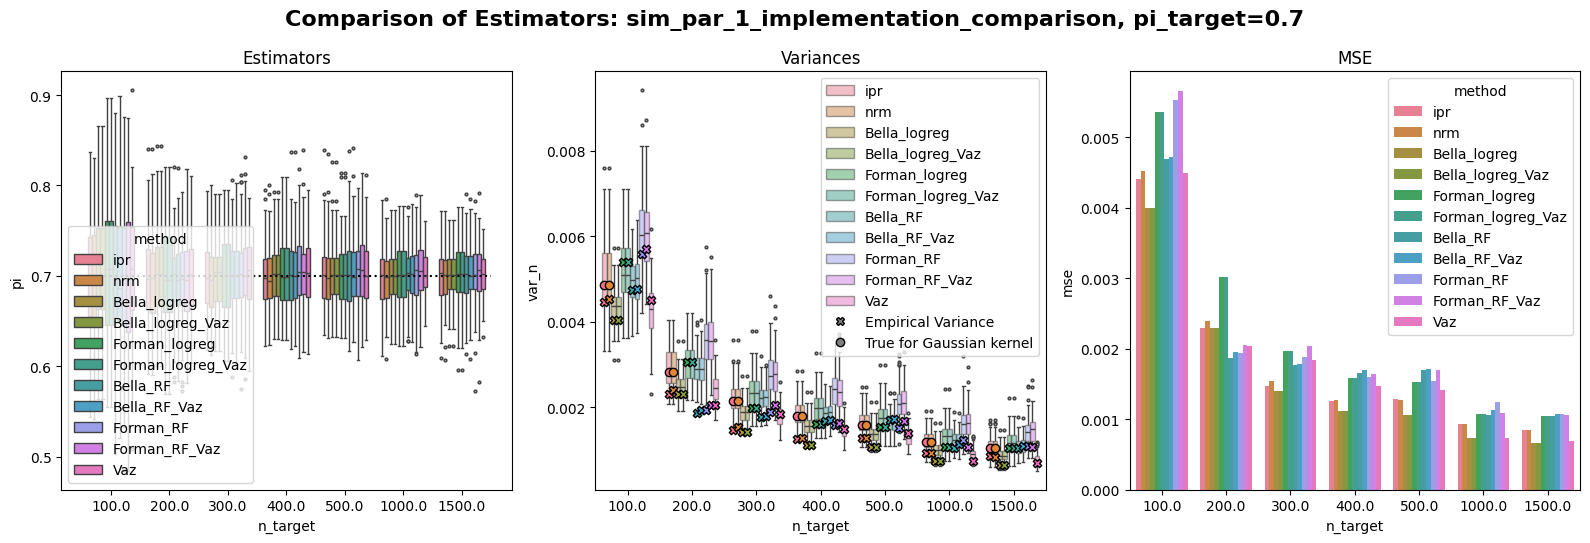

In [ ]:
method_names = ['ipr', 'nrm', 
                'Bella_logreg', 'Bella_logreg_Vaz', 'Forman_logreg', 'Forman_logreg_Vaz',
                'Bella_RF', 'Bella_RF_Vaz', 'Forman_RF', 'Forman_RF_Vaz',
                'Vaz'] 
plot_two_plots('sim_par_1_implementation_comparison', 0.7, '07')

In [30]:
sim_scenario = 'sim_par_1-p-10'

In [31]:
list_of_strings = sim_scenario.split('-')

In [32]:
list_of_strings

['sim_par_1', 'p', '10']